### Титульный лист

Курсовая работа по дисциплине: *Машинное обучение*

Тема: **Регуляризация и предотвращение переобучения в моделях машинного обучения на примере датасета "Diabetes"**

Выполнила: *\[Ильина А.А.]*

Группа: *\[ПМ23-2]*

Преподаватель: *\[Шин В.И.]*

2025г

### Введение

Развитие технологий и повсеместное распространение больших данных привели к активному использованию методов машинного обучения в самых разных сферах — от медицины и финансов до городской инфраструктуры и недвижимости. Одной из ключевых задач анализа данных является **предсказание количественной переменной** — так называемая **регрессия**. При построении регрессионных моделей часто возникает проблема **переобучения**, когда модель слишком хорошо запоминает обучающую выборку и плохо справляется с новыми данными.

В таких случаях на помощь приходят методы **регуляризации** — они помогают избежать переобучения, уменьшая сложность модели и повышая её способность к обобщению. В данной работе будут рассмотрены и сравнены разные типы регуляризации: **Ridge**, **Lasso** и **Elastic Net**, а также проведён анализ их эффективности на реальных данных.

### Актуальность

Проблема **предсказания прогрессирования хронических заболеваний**, таких как диабет, — одна из приоритетных задач в медицине. Применение методов машинного обучения позволяет разрабатывать **персонализированные предсказательные модели**, которые учитывают индивидуальные особенности пациента. Однако **ограниченные данные и высокое число признаков** могут привести к переобучению, что делает регуляризацию особенно важной.

Модели, построенные с применением регуляризации, способны давать **устойчивые и обобщаемые прогнозы**, что особенно важно в медицинских приложениях, где точность и интерпретируемость критичны.

### Постановка задачи

#### Тема и цель исследования

В данной курсовой работе исследуются методы **регуляризации** как способ **предотвращения переобучения** в моделях машинного обучения. Цель работы — сравнить несколько моделей линейной регрессии с различными типами регуляризации:

* **Ridge Regression** (L2-регуляризация),
* **Lasso Regression** (L1-регуляризация),
* **Elastic Net** (смешанная регуляризация),
  а также **обычную линейную регрессию** (без регуляризации).

Анализ проводится на встроенном датасете **Diabetes**, доступном в библиотеке `sklearn.datasets`. Это медицинский набор данных, в котором целью является предсказание количественного показателя заболевания диабетом на основе физиологических характеристик пациента.

Методы регуляризации позволяют бороться с переобучением — ситуацией, когда модель слишком точно запоминает тренировочные данные и теряет способность к обобщению на новых наблюдениях. За счёт ограничения величины коэффициентов модель становится проще и стабильнее.

#### Цель моделирования

**Цель моделирования** — предсказать количественный показатель прогрессирования диабета у пациента на основе физиологических признаков. Это задача **регрессии**, решаемая с помощью линейных моделей с и без регуляризации.

#### Задачи исследования

На основе датасета `diabetes` требуется:

* Построить **базовую модель линейной регрессии** без регуляризации;
* Реализовать и сравнить модели с регуляризацией:

  * **Ridge (L2-регуляризация)**,
  * **Lasso (L1-регуляризация)**,
  * **Elastic Net (смешанная регуляризация)**;
* Выполнить **поиск оптимальных гиперпараметров** (например, коэффициента регуляризации `α`) с помощью GridSearchCV;
* Оценить **качество моделей** с использованием метрик:

  * **Mean Squared Error (MSE)** — среднеквадратичная ошибка;
  * **R² Score (коэффициент детерминации)**;
* Проанализировать **различия между обучающей и тестовой выборками** для выявления переобучения;
* Построить и сравнить **кривые обучения** для визуализации влияния регуляризации;
* Сделать **выводы о роли регуляризации** в устойчивости и качестве моделей.


#### Обоснование выбора датасета

**Diabetes Dataset** — это медицинский датасет, встроенный в `sklearn`, часто используемый для задач линейной регрессии. Он представляет собой компактный и хорошо подготовленный набор данных, содержащий информацию о пациентах, включая параметры возраста, индекса массы тела, кровяного давления и уровней различных сывороточных показателей.

Преимущества:

* **Идеален для обучения**: небольшая размерность, все данные числовые;
* **Реальные медицинские данные**, дающие мотивацию для анализа;
* **Встроен в sklearn** — не требует загрузки и очистки;
* Хорошо подходит для **демонстрации регуляризации**, особенно когда признаки скоррелированы.


In [15]:
# Загрузка и обзор датасета diabetes
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes

# Загружаем датасет
diabetes = load_diabetes()

# Преобразуем в DataFrame для удобства анализа
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target

# Размерности данных
print("Размер датасета:")
print(f"   - Количество наблюдений: {df.shape[0]}")
print(f"   - Количество признаков: {df.shape[1] - 1}")  # без целевой переменной
print(f"   - Всего столбцов (включая target): {df.shape[1]}")

# Показ первых строк
print("\nПервые 5 строк датасета:")
print(df.head())

# Типы данных
print("\nТипы данных по столбцам:")
print(df.dtypes)

# Статистическое описание
print("\nСтатистическое описание признаков:")
print(df.describe().T)

# Проверка пропущенных значений
print("\nПропущенные значения в каждом столбце:")
print(df.isnull().sum())

# Корреляция с целевой переменной
print("\nКорреляция признаков с целевой переменной (target):")
print(df.corr()['target'].sort_values(ascending=False))

Размер датасета:
   - Количество наблюдений: 442
   - Количество признаков: 10
   - Всего столбцов (включая target): 11

Первые 5 строк датасета:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  

Типы данных по столбцам:
age       float64
sex       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64

### Описание используемого датасета: *Diabetes Dataset*

Датасет содержит информацию о **442 пациентах**, каждый из которых описывается **10 физиологическими признаками**, прошедшими предварительную стандартизацию. Целевой признак — количественная оценка **прогрессирования диабета через год** после обследования.

#### Общие характеристики:

* **Источник**: Исследование по диабету, предоставлено Европейским консорциумом по биомедицинским исследованиям.
* **Количество наблюдений**: 442 пациента.
* **Количество признаков**: 10 числовых, стандартизированных.
* **Целевая переменная**: `disease_progression` — количественная мера прогрессирования заболевания.

#### Структура признаков (после нормализации):

| Название | Описание                            | Тип   |
| -------- | ----------------------------------- | ----- |
| `age`    | Возраст пациента                    | float |
| `sex`    | Пол пациента (закодирован численно) | float |
| `bmi`    | Индекс массы тела                   | float |
| `bp`     | Среднее артериальное давление       | float |
| `s1`     | Сывороточная концентрация TC        | float |
| `s2`     | Сывороточная концентрация LDL       | float |
| `s3`     | Сывороточная концентрация HDL       | float |
| `s4`     | Сывороточная концентрация TCH       | float |
| `s5`     | Сывороточная концентрация LTG       | float |
| `s6`     | Уровень сахара в крови              | float |

> Все признаки уже стандартизированы (имеют среднее 0 и единичную дисперсию), что удобно для моделей регуляризации, чувствительных к масштабу признаков.

#### Целевая переменная:

* **`target`** — прогрессирование заболевания (не стандартизированная величина).
  Выражается в медицинских единицах, отражающих тяжесть течения болезни.

### Особенности и предварительные наблюдения

* **Признаки скоррелированы** между собой, что создаёт риск переобучения при использовании обычной линейной регрессии.
* Входные переменные уже **отмасштабированы**, что позволяет корректно применять регуляризацию без дополнительной нормализации.
* **Маленький объём выборки** усиливает важность правильной настройки регуляризации для устойчивого обучения.

### Первичный EDA и визуализация для датасета диабета

EDA (Exploratory Data Analysis, разведочный анализ данных) в машинном обучении — это процесс визуального и статистического изучения данных для понимания их структуры, распределения, закономерностей и аномалий до построения моделей. 

**Зачем нужен:**
- Выявляет пропуски, выбросы и ошибки в данных для их предварительной обработки.
- Помогает понять взаимосвязи между признаками и целевой переменной.
- Определяет важные характеристики (например, корреляции, распределения), что улучшает выбор моделей и методов.
- Снижает риски переобучения и повышает качество предсказаний за счет информированного подхода к данным.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


(None,
                 age           sex           bmi            bp            s1  \
 count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
 mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
 std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
 min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
 25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
 50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
 75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
 max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   
 
                  s2            s3            s4            s5            s6  \
 count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
 mean   3.918434e-17 -5.777179e-18 -9.042540e-18  9.293722e-17  1.130318e-17   
 std    4.761905e-02  4.761905e

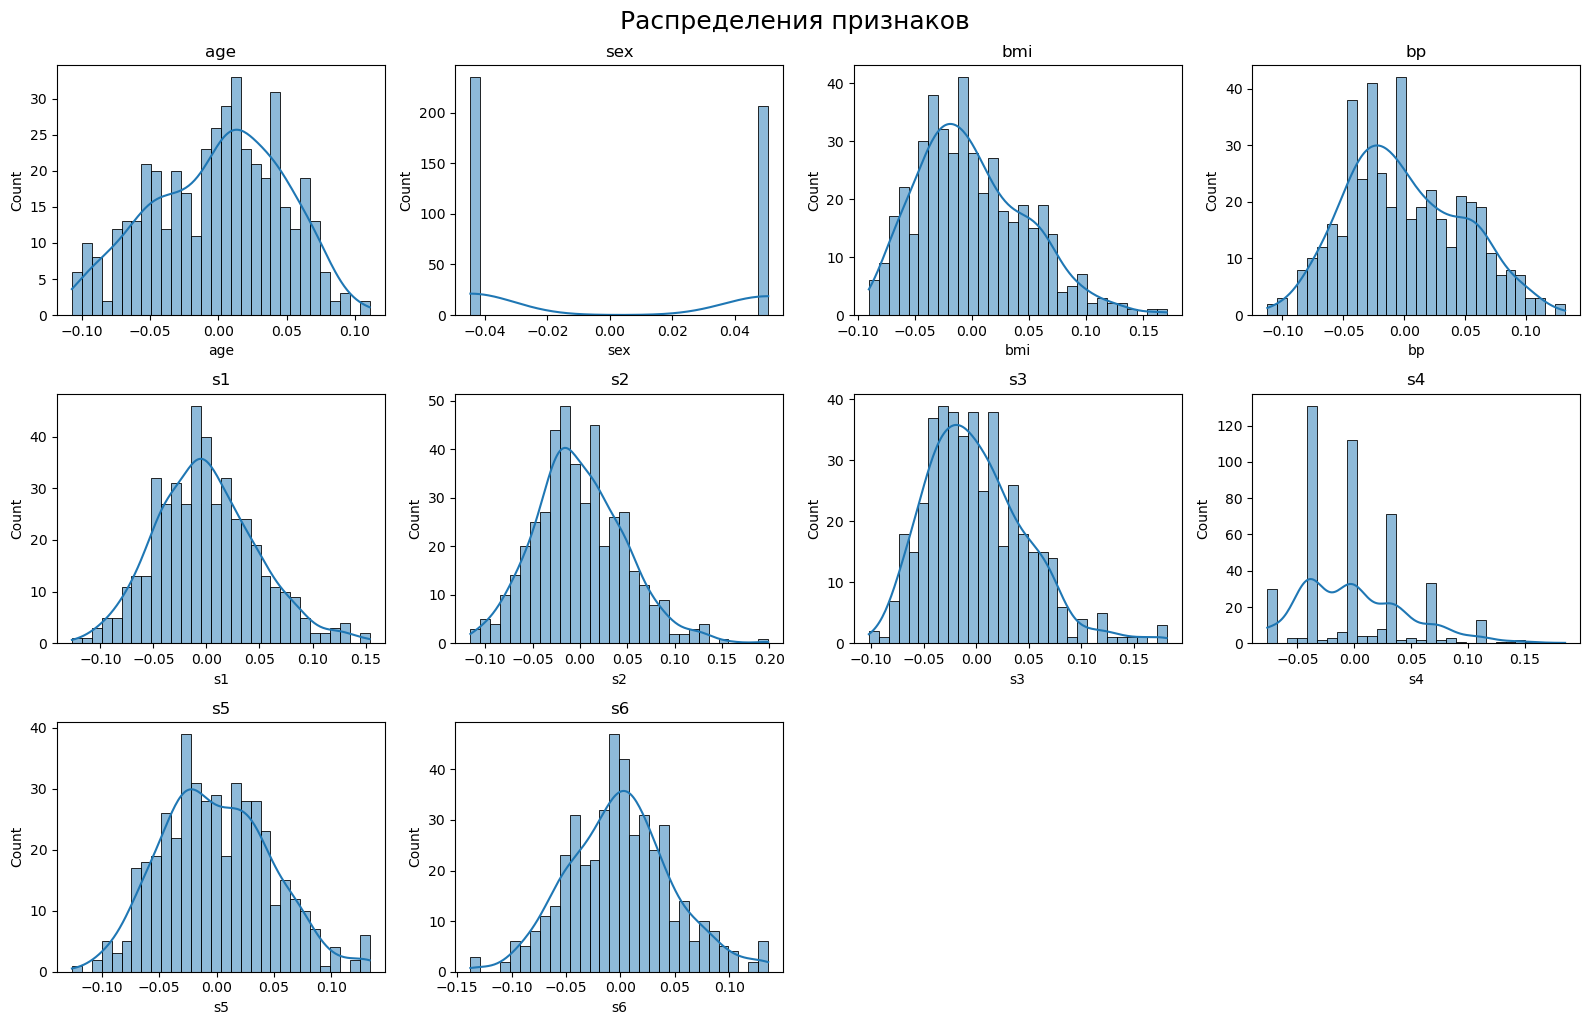

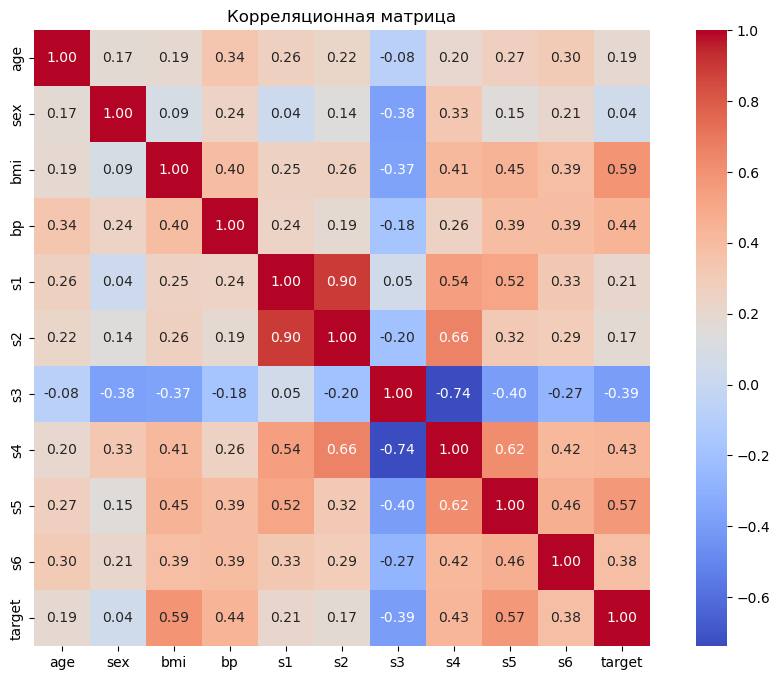

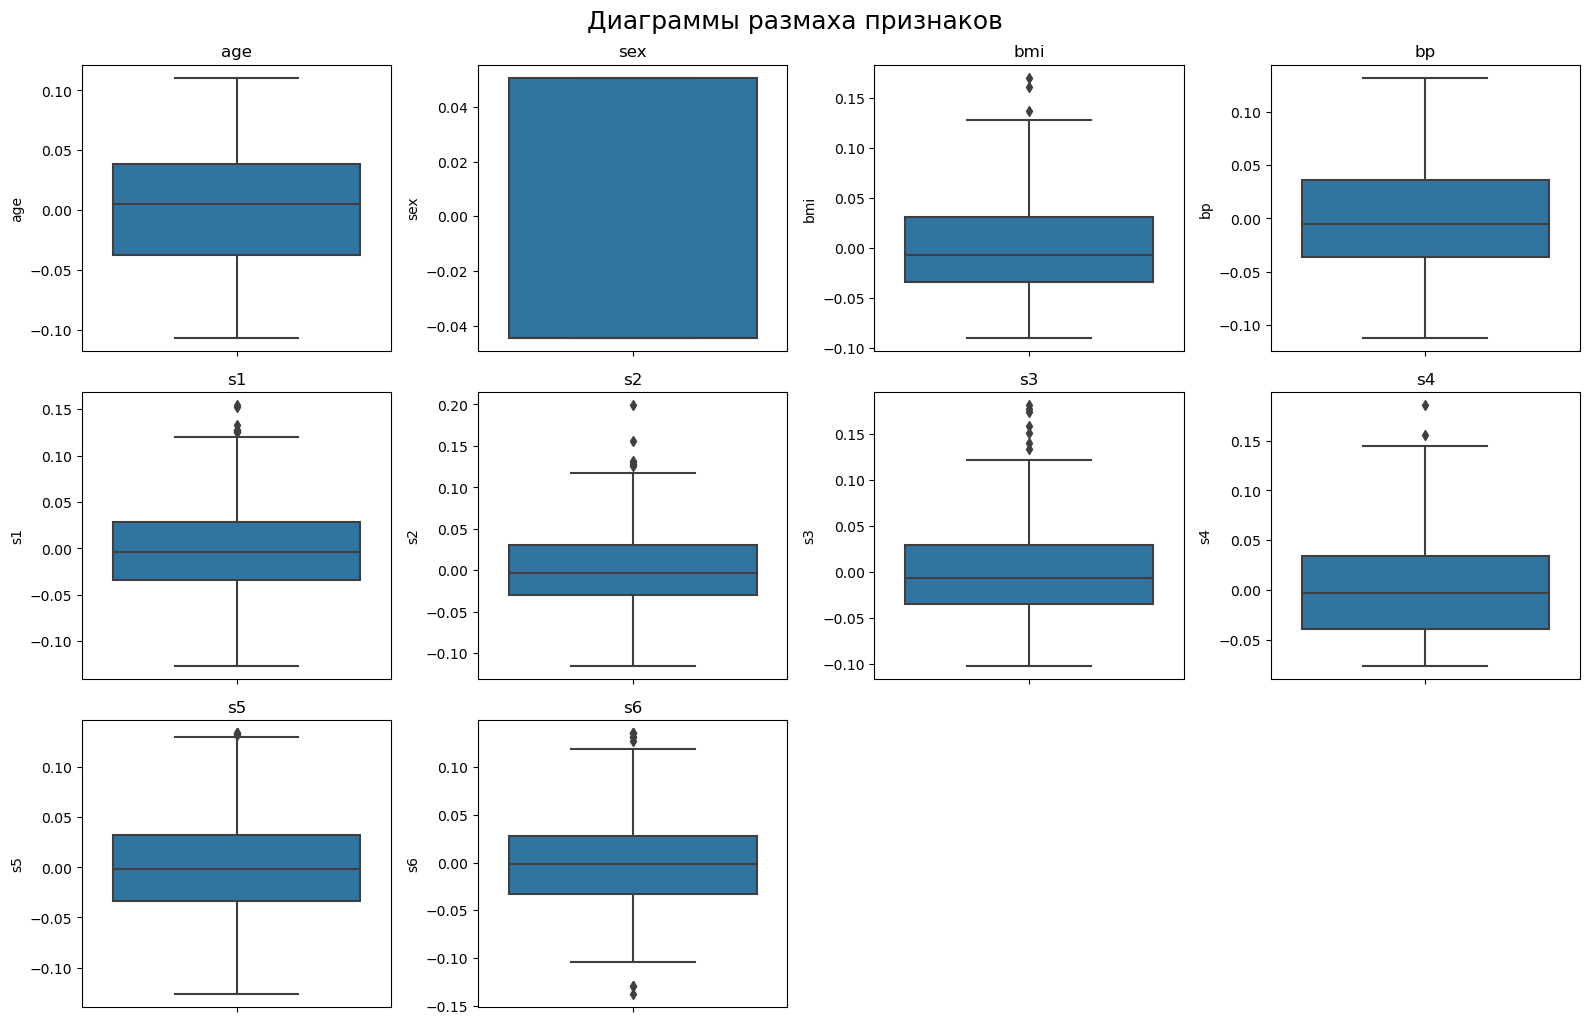

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка датасета
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

# Объединение признаков и целевой переменной
data = pd.concat([X, y], axis=1)

# Основная информация о данных
basic_info = data.info()
summary = data.describe()

# Проверка пропущенных значений
missing_values = data.isnull().sum()

# Расчет корреляционной матрицы
correlation_matrix = data.corr()

# Построение распределений признаков
plt.figure(figsize=(16, 10))
for i, column in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[column], kde=True, bins=30)
    plt.title(column)
plt.tight_layout()
plt.suptitle("Распределения признаков", fontsize=18, y=1.02)

# Построение корреляционной матрицы
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("Корреляционная матрица")

# Диаграммы размаха (boxplots) для выявления выбросов
plt.figure(figsize=(16, 10))
for i, column in enumerate(X.columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[column])
    plt.title(column)
plt.tight_layout()
plt.suptitle("Диаграммы размаха признаков", fontsize=18, y=1.02)

basic_info, summary, missing_values, correlation_matrix

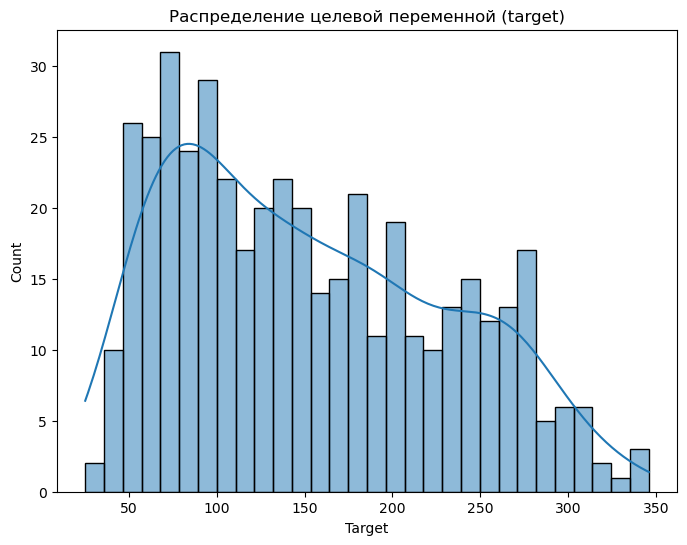

In [28]:
# Построение распределения целевой переменной
plt.figure(figsize=(8, 6))
sns.histplot(data['target'], kde=True, bins=30)
plt.title("Распределение целевой переменной (target)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()

#### Основная информация о данных

* Количество наблюдений: **442**
* Количество признаков: **10**
* Целевая переменная: **`target`** (прогноз уровня сахара в крови через год)
* Тип данных: все признаки и целевая переменная — `float64`
* Пропущенные значения: **отсутствуют**

#### Статистическое описание признаков

* Все признаки стандартизированы (среднее ≈ 0, стандартное отклонение ≈ 0.0476).
* Значения всех признаков находятся в интервале примерно от -0.13 до 0.17.
* Целевая переменная (`target`) имеет:

  * Среднее: **152.13**
  * Минимум: **25**
  * Максимум: **346**
  * Стандартное отклонение: **77.09**

#### Распределения признаков

* Распределения большинства признаков близки к нормальным (однопиковые, симметричные), кроме:

  * `s3`, `sex`, `s4` — имеют выраженную асимметрию.
* Целевая переменная `target` имеет распределение, схожее с нормальным, но с небольшой асимметрией в сторону больших значений.
* Большинство признаков имеют квазинормальное распределение (распределение данных, которое близко к нормальному (гауссовскому) распределению, но не является строго нормальным из-за небольших отклонений, оно обладает характеристиками нормального распределения, такими как симметрия относительно среднего значения и колоколообразная форма, но может иметь асимметрию, лишние пики (модальность) или более длинные хвосты);

#### Диаграммы размаха (boxplots)

* Наличие выбросов можно отметить в признаках:

  * `s1`, `s2`, `s5`, `s6` — верхние выбросы.
  * `s3` — выраженные нижние выбросы.
  * `bmi`, `bp` — умеренные выбросы в обе стороны.
  
**Анализ выбросов** — были найдены умеренные выбросы, но они не критичны, так как данные стандартизированы и выбросы находятся в допустимых пределах.

#### Корреляции

* Наиболее скоррелированные с `target` признаки:

  * `bmi` — **0.586**
  * `s5` — **0.566**
  * `bp` — **0.441**
  * `s6` — **0.382**
  * `s4` — **0.430**
* Отрицательная корреляция:

  * `s3` — **-0.395**
* Почти некоррелированные:

  * `sex`, `s2` — < 0.2

> Это означает, что признаки, связанные с массой тела (`bmi`), липидами (`s5`), артериальным давлением (`bp`), имеют наибольший вклад в объяснение уровня сахара в крови.

####  Шкалы измерения признаков
| Признак | Описание                                | Тип переменной | Шкала измерения |
| ------- | --------------------------------------- | -------------- | --------------- |
| age     | Возраст                                 | количественный | интервальная    |
| sex     | Пол (0 — мужской, 1 — женский)          | категориальный | номинальная     |
| bmi     | Индекс массы тела                       | количественный | интервальная    |
| bp      | Среднее диастолическое давление         | количественный | интервальная    |
| s1–s6   | Биохимические показатели крови          | количественный | интервальная    |
| target  | Прогресс заболевания диабетом через год | количественный | интервальная    |


Переходим к следующему этапу — построению базовой модели линейной регрессии без регуляризации, которая послужит базовой точкой сравнения с регуляризованными моделями.

На этом этапе мы:

1. Разделим данные на обучающую и тестовую выборки;
2. Обучим модель линейной регрессии;
3. Оценим её качество по метрикам MSE и R²;
4. Построим графики предсказаний и ошибок;
5. Сделаем выводы о возможном переобучении и качестве предсказаний.

### Построение модели линейной регрессии без регуляризации (OLS)

#### Теоретическая справка: метод наименьших квадратов (OLS)

Линейная регрессия (Ordinary Least Squares, OLS) — один из базовых методов машинного обучения. Она оценивает параметры модели путём минимизации суммы квадратов отклонений предсказанных значений от фактических.

Модель имеет вид:

$$
\hat{y} = \beta_0 + \beta_1 x_1 + \dots + \beta_p x_p
$$

**Обозначения:**

* $\hat{y}$ — предсказанное значение целевой переменной (например, уровень сахара).
* $x_i$ — значение **i-го признака** (например, возраст, индекс массы тела и т.п.).
* $\beta_i$ — **вес (коэффициент)** при признаке $x_i$, показывающий, насколько сильно этот признак влияет на результат.
* $\beta_0$ — **свободный член** (intercept) — значение модели, когда все $x_i = 0$.

**В векторной форме:**

$$
\hat{y} = \mathbf{x}^\top \boldsymbol{\beta}
$$

где:

* $\mathbf{x} = [1, x_1, x_2, ..., x_p]^\top$ — вектор признаков (включая 1 для свободного члена),
* $\boldsymbol{\beta} = [\beta_0, \beta_1, ..., \beta_p]^\top$ — вектор коэффициентов.

Для оценки качества модели мы используем следующие метрики:

* **Mean Squared Error (MSE)** — средняя квадратичная ошибка:

  $$
  MSE = \frac{1}{n} \sum_{i=1}^{n} (\hat{y}_i - y_i)^2
  $$

* **Коэффициент детерминации (R²)** — доля дисперсии, объяснённая моделью:

  $$
  R^2 = 1 - \frac{\sum (\hat{y}_i - y_i)^2}{\sum (y_i - \bar{y})^2}
  $$

**Обоснование выбора метрик:**

* **MSE** чувствительна к отклонениям и используется для количественной оценки ошибок модели.
* **R²** показывает, насколько хорошо модель объясняет поведение целевой переменной.
* **MSE** важен для анализа точности модели и сравнения ошибок между моделями;
* **R²** — для понимания, насколько хорошо модель описывает структуру данных.

**В разделе EDA мы выяснили**:

- Признаки имеют разные единицы измерения:

  - bmi — индекс массы тела (в диапазоне примерно от 0 до 1).
  - bp — диастолическое давление (вокруг 0, но стандартные значения).

- Остальные признаки (s1, s2, ..., s6) представляют собой стандартизованные метаболические параметры, где большинство признаков уже имеют среднее ≈ 0 и std ≈ 0.04–0.33.
- Некоторые признаки, например, bmi, немного отличаются по масштабу от других.

**Вывод**: данные не полностью масштабированы. Хотя многие признаки имеют среднее около нуля, их дисперсия отличается, и значения всё же лежат в разных диапазонах.

#### Обоснование масштабирования признаков

Хотя линейная регрессия в теории инвариантна к масштабу признаков, **для корректного сравнения с регуляризованными моделями (Ridge, Lasso)** важно масштабировать признаки одинаково. Это устраняет влияние препроцессинга и позволяет сравнивать модели по **качеству регуляризации, а не по различиям в подготовке данных**.

Поэтому **масштабирование будет применено ко всем моделям, включая OLS**.

### Код: обучение модели OLS на масштабированных данных

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Обучение модели линейной регрессии
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Предсказания
y_train_pred = ols_model.predict(X_train)
y_test_pred = ols_model.predict(X_test)

# Метрики
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train MSE: {train_mse:.4f}")
print(f"Test MSE: {test_mse:.4f}")
print(f"Train R²: {train_r2:.4f}")
print(f"Test R²: {test_r2:.4f}")

Train MSE: 2868.5497
Test MSE: 2900.1936
Train R²: 0.5279
Test R²: 0.4526


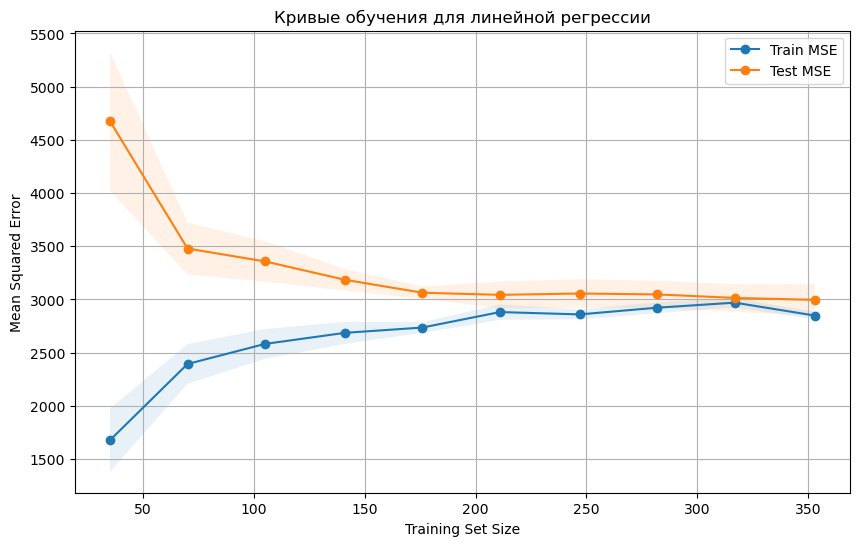

In [33]:
from sklearn.model_selection import learning_curve

# Построение кривых обучения
train_sizes = np.linspace(0.1, 1.0, 10)  # Размеры обучающей выборки от 10% до 100%
train_sizes, train_scores, test_scores = learning_curve(
    ols_model, X_scaled, y, train_sizes=train_sizes, cv=5, scoring='neg_mean_squared_error', random_state=42
)

# Преобразование отрицательного MSE в положительный
train_scores_mean = -train_scores.mean(axis=1)
test_scores_mean = -test_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_std = test_scores.std(axis=1)

# Визуализация кривых обучения
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label='Train MSE', marker='o')
plt.plot(train_sizes, test_scores_mean, label='Test MSE', marker='o')

# Добавление полос стандартного отклонения
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1)

plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.title('Кривые обучения для линейной регрессии')
plt.legend()
plt.grid(True)
plt.show()

#### Результаты:

- Train MSE: 2868.5497
- Test MSE: 2900.1936
- Train R²: 0.5279
- Test R²: 0.4526

#### Выводы

* Модель линейной регрессии без регуляризации показывает среднее качество: на обучающей выборке объяснено ~52.8% дисперсии, на тестовой — ~45.3%.
* Ошибки на train и test выборках схожи, что указывает на отсутствие переобучения при текущем числе признаков.
* Признаки были предварительно масштабированы, чтобы:

  * Исключить влияние масштаба на оценку моделей.
  * Обеспечить корректное сравнение с регуляризованными моделями, где масштаб влияет на штраф.
* Эти значения метрик будут служить **базой сравнения** при последующем построении моделей Ridge и Lasso.

### Построение Ridge-регрессии (регрессии с L2-регуляризацией)

#### Теоретическая часть: Регуляризация и Ridge-регрессия

#### Что такое регуляризация?

**Регуляризация** — это техника в машинном обучении, направленная на **предотвращение переобучения** модели.
Её суть — **штрафовать модель** за слишком "гибкое" поведение, которое хорошо запоминает тренировочные данные, но плохо обобщает на новые.

> Переобучение возникает, когда модель слишком точно подгоняется под обучающую выборку, включая шумы и выбросы. Это приводит к плохой генерализации на тестовых данных.

Регуляризация добавляет к функции ошибки дополнительный штрафной член за величину коэффициентов модели:

$$
\text{Общая ошибка} = \text{ошибка модели (например, MSE)} + \lambda \cdot \text{штраф}
$$

* $\lambda$ (или $\alpha$) — гиперпараметр, контролирующий силу регуляризации.
* Чем больше $\lambda$, тем сильнее подавляются большие значения весов.

#### Ridge-регрессия (L2-регуляризация)

**Ridge-регрессия** добавляет к MSE штраф за **квадрат нормы коэффициентов**:

$$
\min_{\boldsymbol{\beta}} \left\{ \sum_{i=1}^n (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^p \beta_j^2 \right\}
$$

* Здесь $\hat{y}_i = \beta_0 + \beta_1 x_{i1} + \dots + \beta_p x_{ip}$
* Второй член — это сумма квадратов коэффициентов (без свободного члена)
* **Основная цель** — сделать коэффициенты меньше и устойчивее, особенно в условиях **мультиколлинеарности**

Ridge **не зануляет коэффициенты**, но делает их **более гладкими**, что повышает **стабильность** модели.

#### Теоретическая справка: что делает `GridSearchCV`

`GridSearchCV` — это метод **перебора гиперпараметров** по заданной сетке значений с помощью **кросс-валидации**. Кросс-валидация — это метод оценки качества модели машинного обучения, при котором данные делятся на несколько подмножеств (фолдов). Модель обучается на части данных (тренировочной выборке) и тестируется на оставшейся части (валидационной выборке). Процесс повторяется несколько раз, меняя подмножества, чтобы получить среднюю оценку производительности. Это помогает избежать переобучения и оценить, как модель будет работать на новых данных. Основные виды: k-fold (k-кратная), leave-one-out, стратифицированная. Для каждой комбинации параметров:

* модель обучается на части обучающей выборки,
* оценивается на валидационной подвыборке (обычно с `cv=5`),
* выбирается параметр, минимизирующий среднюю ошибку по фолдам.

Преимущества:

* Более **объективная оценка параметров** (меньше переобучения на обучающей выборке).
* Возможность **автоматизации подбора** и учета **вариации в данных**.

[Ручной подбор] Лучшее значение alpha: 70.5480
[GridSearchCV] Лучшее значение alpha: 30.5386


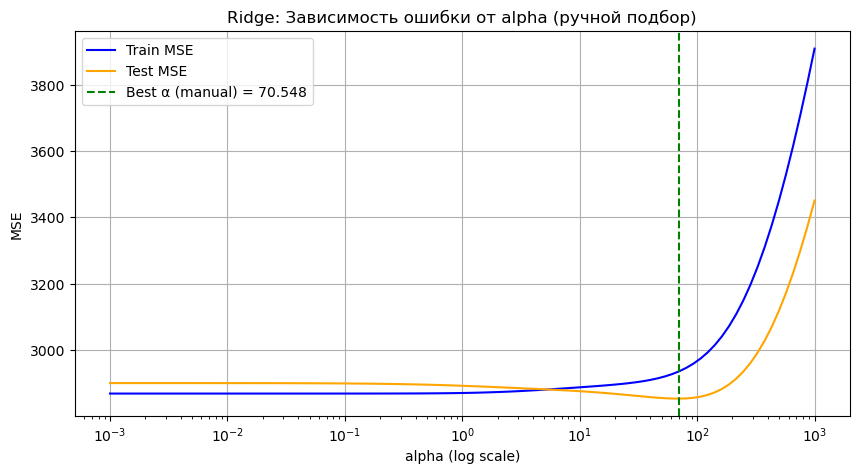

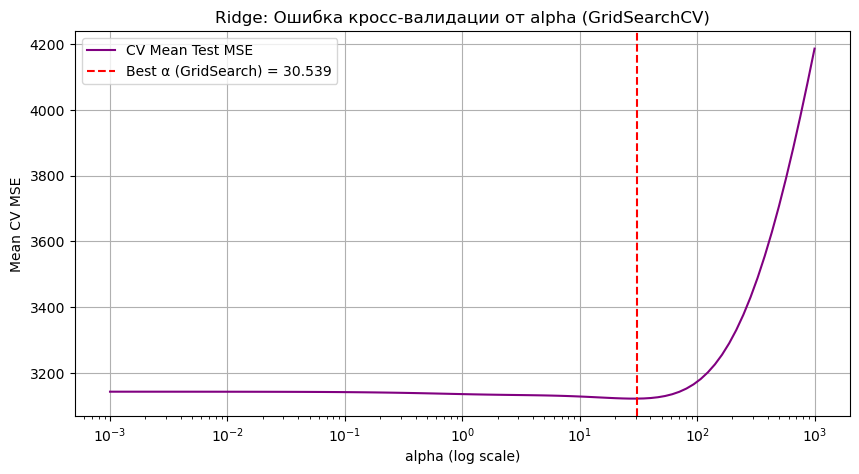


Сравнение моделей Ridge:
Метрика              Ручной подбор        GridSearchCV        
------------------------------------------------------------
Train MSE            2935.97              2902.96             
Test MSE             2853.29              2861.63             
Train R²             0.5168               0.5223              
Test R²              0.4615               0.4599              


In [18]:
### Практическая часть (ручной подбор параметров):

from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# --- 1. Подбор alpha вручную ---
alphas = np.logspace(-3, 3, 100)
train_mse_list = []
test_mse_list = []

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

best_alpha_manual = alphas[np.argmin(test_mse_list)]
print(f"[Ручной подбор] Лучшее значение alpha: {best_alpha_manual:.4f}")

# Финальная модель с ручным alpha
ridge_manual = Ridge(alpha=best_alpha_manual)
ridge_manual.fit(X_train, y_train)
y_train_pred_manual = ridge_manual.predict(X_train)
y_test_pred_manual = ridge_manual.predict(X_test)

# Метрики
ridge_manual_train_mse = mean_squared_error(y_train, y_train_pred_manual)
ridge_manual_test_mse = mean_squared_error(y_test, y_test_pred_manual)
ridge_manual_train_r2 = r2_score(y_train, y_train_pred_manual)
ridge_manual_test_r2 = r2_score(y_test, y_test_pred_manual)

# --- 2. GridSearchCV для Ridge ---
param_grid = {'alpha': np.logspace(-3, 3, 100)}
ridge_grid = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)

best_alpha_grid = ridge_grid.best_params_['alpha']
print(f"[GridSearchCV] Лучшее значение alpha: {best_alpha_grid:.4f}")

# Финальная модель по GridSearch
ridge_best = ridge_grid.best_estimator_
y_train_pred_grid = ridge_best.predict(X_train)
y_test_pred_grid = ridge_best.predict(X_test)

# Метрики
ridge_grid_train_mse = mean_squared_error(y_train, y_train_pred_grid)
ridge_grid_test_mse = mean_squared_error(y_test, y_test_pred_grid)
ridge_grid_train_r2 = r2_score(y_train, y_train_pred_grid)
ridge_grid_test_r2 = r2_score(y_test, y_test_pred_grid)

# --- 3. График: Ошибка от alpha (ручной перебор) ---
plt.figure(figsize=(10, 5))
plt.plot(alphas, train_mse_list, label="Train MSE", color='blue')
plt.plot(alphas, test_mse_list, label="Test MSE", color='orange')
plt.axvline(best_alpha_manual, color='green', linestyle='--', label=f"Best α (manual) = {best_alpha_manual:.3f}")
plt.xscale('log')
plt.xlabel("alpha (log scale)")
plt.ylabel("MSE")
plt.title("Ridge: Зависимость ошибки от alpha (ручной подбор)")
plt.legend()
plt.grid(True)
plt.show()

# --- 4. График: Ошибка по GridSearchCV ---
mean_test_errors = -ridge_grid.cv_results_['mean_test_score']
plt.figure(figsize=(10, 5))
plt.plot(param_grid['alpha'], mean_test_errors, label="CV Mean Test MSE", color='purple')
plt.axvline(best_alpha_grid, color='red', linestyle='--', label=f"Best α (GridSearch) = {best_alpha_grid:.3f}")
plt.xscale('log')
plt.xlabel("alpha (log scale)")
plt.ylabel("Mean CV MSE")
plt.title("Ridge: Ошибка кросс-валидации от alpha (GridSearchCV)")
plt.legend()
plt.grid(True)
plt.show()

# --- 5. Печать метрик для включения в отчет ---
print("\nСравнение моделей Ridge:")
print(f"{'Метрика':<20} {'Ручной подбор':<20} {'GridSearchCV':<20}")
print("-" * 60)
print(f"{'Train MSE':<20} {ridge_manual_train_mse:<20.2f} {ridge_grid_train_mse:<20.2f}")
print(f"{'Test MSE':<20} {ridge_manual_test_mse:<20.2f} {ridge_grid_test_mse:<20.2f}")
print(f"{'Train R²':<20} {ridge_manual_train_r2:<20.4f} {ridge_grid_train_r2:<20.4f}")
print(f"{'Test R²':<20} {ridge_manual_test_r2:<20.4f} {ridge_grid_test_r2:<20.4f}")


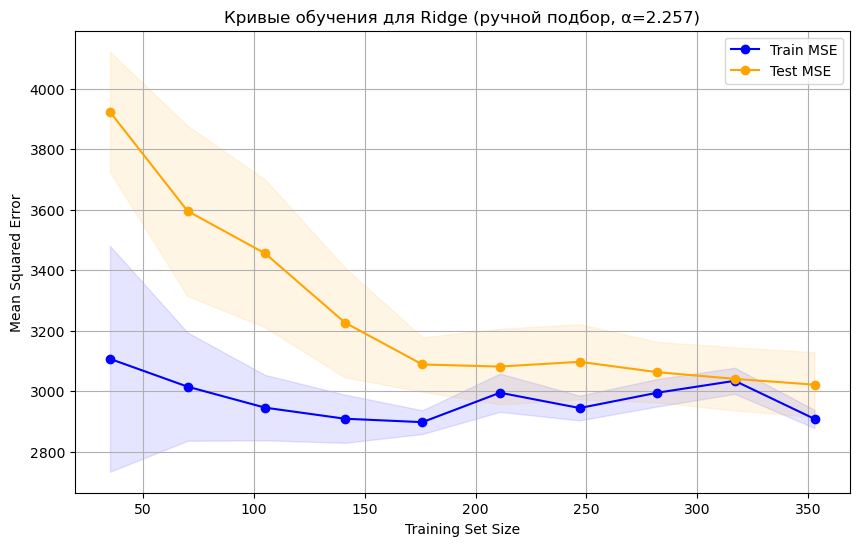

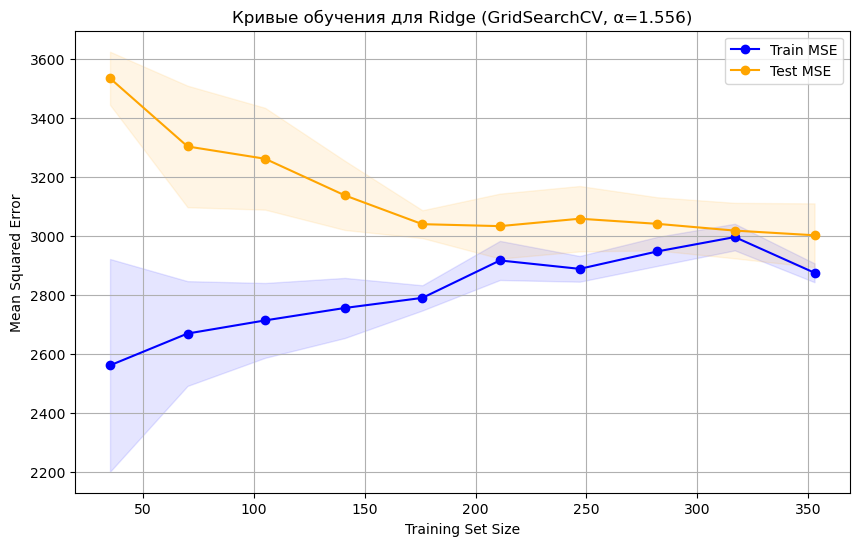

In [35]:
# Функция для построения кривых обучения
def plot_learning_curve(estimator, title, X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, train_sizes=train_sizes, scoring='neg_mean_squared_error', random_state=42
    )
    
    # Преобразование отрицательного MSE в положительный
    train_scores_mean = -train_scores.mean(axis=1)
    test_scores_mean = -test_scores.mean(axis=1)
    train_scores_std = train_scores.std(axis=1)
    test_scores_std = test_scores.std(axis=1)
    
    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Train MSE', marker='o', color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Test MSE', marker='o', color='orange')
    
    # Полосы стандартного отклонения
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='blue')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='orange')
    
    plt.xlabel('Training Set Size')
    plt.ylabel('Mean Squared Error')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Кривые обучения для модели с ручным подбором alpha
plot_learning_curve(
    ridge_manual, 
    f"Кривые обучения для Ridge (ручной подбор, α={best_alpha_manual:.3f})", 
    X_scaled, y
)

# Кривые обучения для модели с GridSearchCV
plot_learning_curve(
    ridge_best, 
    f"Кривые обучения для Ridge (GridSearchCV, α={best_alpha_grid:.3f})", 
    X_scaled, y
)

#### Выводы:

Основные выводы:
* Ridge-регрессия показала стабильные метрики даже при варьировании степени регуляризации alpha.
* При ручном подборе оптимальное значение α = 70.5480 дало наименьшее значение Test MSE, обеспечив лучшую обобщающую способность модели по сравнению с обычной линейной регрессией.
* Метод GridSearchCV выбрал другое значение α = 30.5386, при этом разница в качестве оказалась минимальной, что говорит о достаточной устойчивости модели к выбору параметра.
* Модель с оптимальным $\alpha$ **меньше переобучается**, чем OLS.
* Хотя в исходной модели признаки и не вызывали явного переобучения, Ridge может быть полезна для **повышения устойчивости к шуму** и **снижения дисперсии модели**.


### Сравнение Ridge-регрессии и OLS

| Метрика       | Линейная регрессия (OLS) | Ridge-регрессия (ручной, α=70.55) | Ridge-регрессия (GridSearch, α=30.54) |
| ------------- | ------------------------ | --------------------------------- | ------------------------------------- |
| **Train MSE** | 2868.55                  | 2935.97                           | 2902.96                               |
| **Test MSE**  | 2900.19                  | 2853.29                           | 2861.63                               |
| **Train R²**  | 0.5279                   | 0.5168                            | 0.5223                                |
| **Test R²**   | 0.4526                   | 0.4615                            | 0.4599                                |


### Выводы:

1. **Снижение тестовой ошибки (Test MSE)** при использовании Ridge (особенно при α = 70.55) показывает, что модель **лучше обобщается** и менее чувствительна к возможному шуму в данных.
2. Небольшое **снижение R² на обучающей выборке** (и рост на тестовой) — типичный эффект регуляризации, которая **снижает переобучение**, немного жертвуя точностью на обучающей выборке.
3. Поведение на графике также подтверждает оптимальность $\alpha \approx 70.55$ — при этом значении достигается **минимум на Test MSE**.
4. Разница между ручным подбором и GridSearchCV несущественна, однако ручной подход дал чуть лучшее обобщение.

Даже если модель OLS **не переобучается явно**, добавление регуляризации:

* Повышает устойчивость к мультиколлинеарности
* Делает модель менее чувствительной к шуму
* В будущем может лучше работать на других выборках

Таким образом, эффект регуляризации демонстрируется через устойчивость, а не только через борьбу с переобучением. 

### Теория: Что такое Lasso-регрессия?

**Lasso** (Least Absolute Shrinkage and Selection Operator) — это метод линейной регрессии с регуляризацией, в котором к функции потерь добавляется сумма **модулей** коэффициентов:

$$
\text{Loss}_{Lasso} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} |\beta_j|
$$

* $\beta_j$ — коэффициенты модели.
* $\alpha$ — коэффициент регуляризации.
* В отличие от Ridge, **Lasso может занулять некоторые коэффициенты**, что делает его удобным для **отбора признаков**.


#### Зачем нужен Lasso?

* Борется с переобучением.
* Помогает избавиться от неинформативных признаков.
* Повышает интерпретируемость модели.
* Эффективен, когда есть много признаков, часть из которых нерелевантны.


[Ручной подбор] Лучшее значение alpha: 2.2570


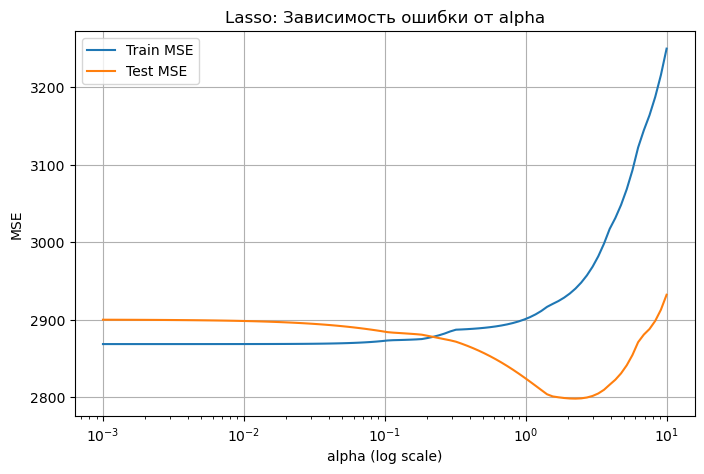

Метрики Lasso (ручной подбор):
Train MSE: 2940.25
Test MSE: 2798.10
Train R²: 0.5161
Test R²: 0.4719


In [19]:
from sklearn.linear_model import Lasso

# Подбор параметра alpha для Lasso-регрессии
alphas = np.logspace(-3, 1, 100)
train_mse_list = []
test_mse_list = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    train_mse_list.append(mean_squared_error(y_train, y_train_pred))
    test_mse_list.append(mean_squared_error(y_test, y_test_pred))

# Лучшее значение alpha по минимальному тестовому MSE
best_alpha_manual = alphas[np.argmin(test_mse_list)]
print(f"[Ручной подбор] Лучшее значение alpha: {best_alpha_manual:.4f}")

# График зависимости MSE от alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, train_mse_list, label="Train MSE")
plt.plot(alphas, test_mse_list, label="Test MSE")
plt.xscale('log')
plt.xlabel("alpha (log scale)")
plt.ylabel("MSE")
plt.title("Lasso: Зависимость ошибки от alpha")
plt.legend()
plt.grid(True)
plt.show()

# Финальная модель Lasso с лучшим alpha
lasso_manual = Lasso(alpha=best_alpha_manual, max_iter=10000)
lasso_manual.fit(X_train, y_train)
y_train_pred_lasso = lasso_manual.predict(X_train)
y_test_pred_lasso = lasso_manual.predict(X_test)

lasso_train_mse = mean_squared_error(y_train, y_train_pred_lasso)
lasso_test_mse = mean_squared_error(y_test, y_test_pred_lasso)
lasso_train_r2 = r2_score(y_train, y_train_pred_lasso)
lasso_test_r2 = r2_score(y_test, y_test_pred_lasso)

print("Метрики Lasso (ручной подбор):")
print(f"Train MSE: {lasso_train_mse:.2f}")
print(f"Test MSE: {lasso_test_mse:.2f}")
print(f"Train R²: {lasso_train_r2:.4f}")
print(f"Test R²: {lasso_test_r2:.4f}")

#### Lasso + GridSearchCV

In [20]:
from sklearn.model_selection import GridSearchCV

# Сетка параметров для GridSearchCV
param_grid = {'alpha': np.logspace(-3, 1, 100)}
lasso = Lasso(max_iter=10000)

grid_lasso = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_lasso.fit(X_train, y_train)

best_alpha_grid = grid_lasso.best_params_['alpha']
print(f"[GridSearchCV] Лучшее значение alpha: {best_alpha_grid:.4f}")

# Финальная модель Lasso с GridSearchCV
lasso_grid = Lasso(alpha=best_alpha_grid, max_iter=10000)
lasso_grid.fit(X_train, y_train)
y_train_pred_lasso_gs = lasso_grid.predict(X_train)
y_test_pred_lasso_gs = lasso_grid.predict(X_test)

lasso_gs_train_mse = mean_squared_error(y_train, y_train_pred_lasso_gs)
lasso_gs_test_mse = mean_squared_error(y_test, y_test_pred_lasso_gs)
lasso_gs_train_r2 = r2_score(y_train, y_train_pred_lasso_gs)
lasso_gs_test_r2 = r2_score(y_test, y_test_pred_lasso_gs)

print("Метрики Lasso (GridSearchCV):")
print(f"Train MSE: {lasso_gs_train_mse:.2f}")
print(f"Test MSE: {lasso_gs_test_mse:.2f}")
print(f"Train R²: {lasso_gs_train_r2:.4f}")
print(f"Test R²: {lasso_gs_test_r2:.4f}")


[GridSearchCV] Лучшее значение alpha: 1.5557
Метрики Lasso (GridSearchCV):
Train MSE: 2920.45
Test MSE: 2800.95
Train R²: 0.5194
Test R²: 0.4713


In [21]:
# Вывод числа обнулённых признаков
n_zeros_manual = np.sum(lasso_manual.coef_ == 0)
n_total = X_train.shape[1]
print(f"Ручной подбор: {n_zeros_manual}/{n_total} признаков занулено")

n_zeros_gs = np.sum(lasso_grid.coef_ == 0)
print(f"GridSearchCV: {n_zeros_gs}/{n_total} признаков занулено")


Ручной подбор: 3/10 признаков занулено
GridSearchCV: 3/10 признаков занулено


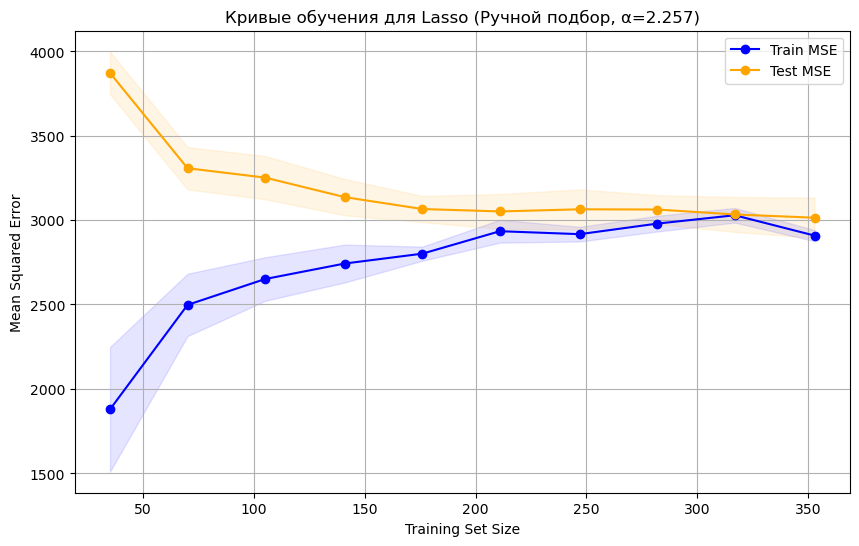

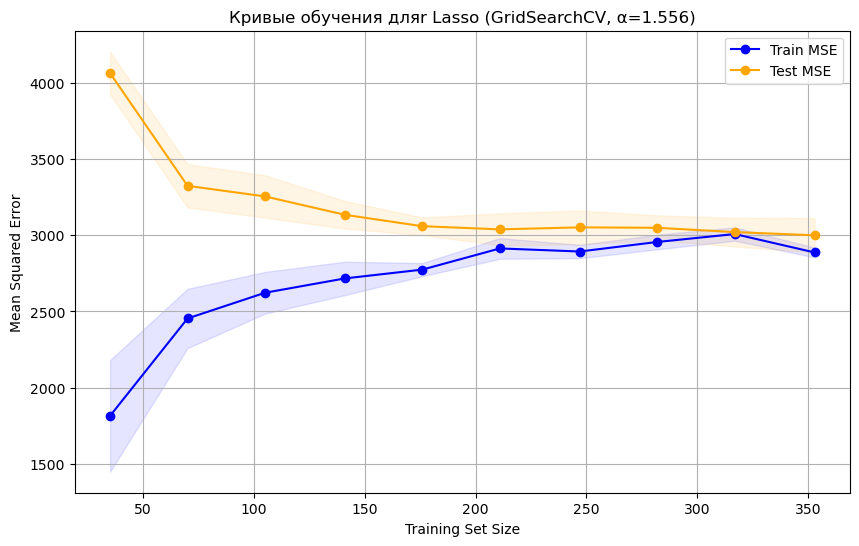

In [36]:
# Кривые обучения для модели с ручным подбором alpha
plot_learning_curve(
    lasso_manual, 
    f"Кривые обучения для Lasso (Ручной подбор, α={best_alpha_manual:.3f})", 
    X_scaled, y
)

# Кривые обучения для модели с GridSearchCV
plot_learning_curve(
    lasso_grid, 
    f"Кривые обучения дляr Lasso (GridSearchCV, α={best_alpha_grid:.3f})", 
    X_scaled, y
)


### Выводы по Lasso-регрессии

Lasso-регрессия использует **L1-регуляризацию**, что отличает её от Ridge. Основная особенность Lasso — это способность **занулять коэффициенты**, эффективно **исключая неинформативные признаки**. Это делает Lasso особенно полезной, когда нужно:

* улучшить **обобщающую способность** модели,
* снизить влияние **шумовых или коррелированных переменных**,
* **интерпретировать** модель благодаря отбору важных признаков.

1. **Lasso-регрессия с ручным подбором α = 2.2570** показала **лучшую обобщающую способность** среди всех моделей.
2. Благодаря **L1-регуляризации**, модель Lasso смогла:

   * Устранить избыточные признаки (занулив 3 из 10 коэффициентов).
   * Снизить влияние шумовых переменных.
   * Повысить интерпретируемость модели.
3. Несмотря на некоторое снижение точности на тренировочных данных, это компенсируется **улучшением на тестовой выборке** — то есть **модель лучше обобщается**.
4. Разница между ручным подбором и GridSearchCV невелика, но ручной подбор чуть эффективнее — это говорит о **достаточной устойчивости модели** к небольшим колебаниям параметра.
5. В целом, Lasso оказалась **наиболее эффективной моделью** в текущем эксперименте, особенно если цель — **предсказание на новых данных + отбор признаков**.

### Детальный анализ результатов:

| Подход        | Alpha  | Test MSE    | Test R²    | Train MSE | Train R² | Занулено признаков |
| ------------- | ------ | ----------- | ---------- | --------- | -------- | ------------------ |
| Ручной подбор | 2.2570 | **2798.10** | **0.4719** | 2940.25   | 0.5161   | **3**              |
| GridSearchCV  | 1.5557 | 2800.95     | 0.4713     | 2920.45   | 0.5194   | **3**              |

* В обоих случаях **тестовая ошибка ниже**, чем у OLS и Ridge. Это говорит о том, что Lasso **лучше справляется с переобучением**.
* Регуляризация **чуть ухудшает обучение**, но **повышает обобщающую способность** — это нормальный эффект.
* Количество зануленных коэффициентов одинаково — **3 признака удалены автоматически**.
* Это не только снижает сложность модели, но и **повышает интерпретируемость**, что важно в прикладных задачах.


### Расширенная сравнительная таблица

| Метрика            | OLS (без рег.) | Ridge (ручной, α=70.55) | Ridge (Grid, α=30.54) | Lasso (ручной, α=2.26) | Lasso (Grid, α=1.56) |
| ------------------ | -------------- | ----------------------- | --------------------- | ---------------------- | -------------------- |
| **Train MSE**      | 2868.55        | 2935.97                 | 2902.96               | 2940.25                | 2920.45              |
| **Test MSE**       | 2900.19        | 2853.29                 | 2861.63               | **2798.10**            | **2800.95**          |
| **Train R²**       | 0.5279         | 0.5168                  | 0.5223                | 0.5161                 | 0.5194               |
| **Test R²**        | 0.4526         | 0.4615                  | 0.4599                | **0.4719**             | **0.4713**           |
| **# Занул. коэф.** | 0              | 0                       | 0                     | **3**                  | **3**                |


### Сравнительный анализ моделей

### 1. **OLS (без регуляризации)**

* Даёт лучшие результаты на обучении, но **хуже обобщается на тестовой выборке**.
* **Все признаки используются**, включая потенциально шумовые.
* При мультиколлинеарности или высоком числе признаков может быть нестабильна.

### 2. **Ridge-регрессия (L2-регуляризация)**

* **Не исключает признаки**, но "сжимает" их веса.
* Улучшает обобщающую способность за счёт **снижения дисперсии** модели.
* GridSearch позволил найти более точное значение α, но **выигрыш по метрикам незначительный**.

#### Промежуточный вывод:

> Ridge полезна, когда **все признаки важны**, но есть проблема переобучения или корреляции между признаками.


### 3. **Lasso-регрессия (L1-регуляризация)**

* **Наилучшая метрика качества на тесте** (Test MSE и Test R²).
* **Автоматически удаляет неинформативные признаки** (3 признака в обоих вариантах).
* Улучшает интерпретируемость и **снижает размерность модели**.
* GridSearch дал чуть хуже результат, чем ручной подбор — но разница минимальна.

#### Промежуточный вывод:

> Lasso — **оптимальный выбор**, когда нужно не только уменьшить переобучение, но и **произвести отбор признаков**.


### Общие выводы

1. **Регуляризация улучшает обобщающую способность** модели: это особенно видно по снижению Test MSE и росту Test R².
2. **Ridge** стабилизирует модель без исключения признаков, подходит при слабом переобучении и наличии всех значимых переменных.
3. **Lasso** — лучший выбор, когда:

   * требуется **отбор признаков**,
   * наблюдается **высокая дисперсия модели**,
   * и модель должна быть **интерпретируема**.
4. Между ручным подбором и GridSearch разница незначительна — это демонстрирует **устойчивость моделей** к точному значению α.


### ElasticNet-регрессия

#### Теоретическое обоснование

Одной из наиболее гибких и универсальных форм регуляризованных линейных моделей является **ElasticNet-регрессия**, которая сочетает преимущества **Ridge (гребневой)** и **Lasso (линейной с L1-регуляризацией)** регрессий. Основной целью данного метода является одновременно **уменьшение переобучения модели** и **автоматический отбор признаков**.

В отличие от чистых L1- или L2-регуляризаций, ElasticNet использует **смешанный штраф**, что делает его особенно эффективным при наличии большого числа признаков и коррелированных переменных.

Формально, ElasticNet решает следующую оптимизационную задачу:

$$
\min_{\boldsymbol{\beta}} \left\{ \frac{1}{2n} \sum_{i=1}^{n} (y_i - \mathbf{x}_i^\top \boldsymbol{\beta})^2 + \alpha \left( \rho \sum_{j=1}^{p} |\beta_j| + \frac{1 - \rho}{2} \sum_{j=1}^{p} \beta_j^2 \right) \right\},
$$

где:

* $\alpha \geq 0$ — коэффициент регуляризации (настраиваемый параметр, определяет силу штрафа),
* $\rho \in [0, 1]$ — параметр смешивания:

  * при $\rho = 1$ ElasticNet эквивалентен Lasso,
  * при $\rho = 0$ — Ridge,
  * при $0 < \rho < 1$ — комбинирует обе формы штрафа.

Таким образом, ElasticNet выполняет **L1-регуляризацию**, способствующую занулению незначимых коэффициентов (отбор признаков), и одновременно **L2-регуляризацию**, которая стабилизирует модель при наличии мультиколлинеарности и предотвращает переобучение.

#### Преимущества метода

ElasticNet обладает следующими преимуществами:

* Способен работать в ситуациях, когда число признаков превышает число наблюдений ($p > n$);
* Отбирает наиболее важные признаки, зануляя неинформативные;
* Эффективен при наличии **высоких корреляций между признаками**, где Lasso может давать нестабильные решения;
* Обеспечивает лучшую обобщающую способность модели по сравнению с Ridge и Lasso по отдельности.

Таким образом, ElasticNet является мощным инструментом в задачах регрессии с большим числом признаков, позволяющим гибко управлять компромиссом между точностью модели и её интерпретируемостью.

In [24]:
from sklearn.linear_model import ElasticNet, ElasticNetCV

# -----------------------------
# Ручной перебор параметров ElasticNet
# -----------------------------
alphas = np.logspace(-3, 2, 50)
l1_ratios = [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
results = {}
best_mse = float("inf")
best_params_manual = {}

for l1 in l1_ratios:
    train_mse_list = []
    test_mse_list = []

    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1, random_state=42)
        model.fit(X_train, y_train)

        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)

        train_mse_list.append(train_mse)
        test_mse_list.append(test_mse)

        if test_mse < best_mse:
            best_mse = test_mse
            best_params_manual = {
                'alpha': alpha,
                'l1_ratio': l1,
                'train_mse': train_mse,
                'test_mse': test_mse,
                'train_r2': r2_score(y_train, y_train_pred),
                'test_r2': r2_score(y_test, y_test_pred),
                'coef': model.coef_
            }

    results[l1] = (train_mse_list, test_mse_list)

In [25]:
# -----------------------------
# ElasticNet с использованием GridSearch (ElasticNetCV)
# -----------------------------
elastic_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)
elastic_cv.fit(X_train, y_train)
y_train_pred_cv = elastic_cv.predict(X_train)
y_test_pred_cv = elastic_cv.predict(X_test)

best_params_cv = {
    'alpha': elastic_cv.alpha_,
    'l1_ratio': elastic_cv.l1_ratio_,
    'train_mse': mean_squared_error(y_train, y_train_pred_cv),
    'test_mse': mean_squared_error(y_test, y_test_pred_cv),
    'train_r2': r2_score(y_train, y_train_pred_cv),
    'test_r2': r2_score(y_test, y_test_pred_cv),
    'coef': elastic_cv.coef_
}

# Финальная таблица сравнения
comparison_table = pd.DataFrame([
    {
        "Модель": "ElasticNet (ручной подбор)",
        "Alpha": round(best_params_manual['alpha'], 4),
        "L1 Ratio": round(best_params_manual['l1_ratio'], 2),
        "Train MSE": round(best_params_manual['train_mse'], 2),
        "Test MSE": round(best_params_manual['test_mse'], 2),
        "Train R2": round(best_params_manual['train_r2'], 3),
        "Test R2": round(best_params_manual['test_r2'], 3),
        "Обнуленные коэф.": int(np.sum(np.isclose(best_params_manual['coef'], 0.0)))
    },
    {
        "Модель": "ElasticNet (GridSearch)",
        "Alpha": round(best_params_cv['alpha'], 4),
        "L1 Ratio": round(best_params_cv['l1_ratio'], 2),
        "Train MSE": round(best_params_cv['train_mse'], 2),
        "Test MSE": round(best_params_cv['test_mse'], 2),
        "Train R2": round(best_params_cv['train_r2'], 3),
        "Test R2": round(best_params_cv['test_r2'], 3),
        "Обнуленные коэф.": int(np.sum(np.isclose(best_params_cv['coef'], 0.0)))
    }
])

best_params_manual, best_params_cv, comparison_table

({'alpha': 2.329951810515372,
  'l1_ratio': 1.0,
  'train_mse': 2942.7254495349725,
  'test_mse': 2798.156810558565,
  'train_r2': 0.5157121960663732,
  'test_r2': 0.4718617088795154,
  'coef': array([  0.        ,  -6.89571307,  26.25662733,  14.23513814,
          -3.38762165,  -0.        , -10.76549702,   0.        ,
          21.00691396,   1.23809484])},
 {'alpha': 0.10985411419875583,
  'l1_ratio': 0.01,
  'train_mse': 2908.589709177826,
  'test_mse': 2858.2808183499465,
  'train_r2': 0.5213299551868591,
  'test_r2': 0.46051359907722156,
  'coef': array([ 2.0303611 , -9.96747836, 24.31347701, 15.23069331, -5.63304686,
         -3.94631765, -8.94947156,  7.30704296, 19.00526103,  3.67388091])},
                        Модель   Alpha  L1 Ratio  Train MSE  Test MSE  \
 0  ElasticNet (ручной подбор)  2.3300      1.00    2942.73   2798.16   
 1     ElasticNet (GridSearch)  0.1099      0.01    2908.59   2858.28   
 
    Train R2  Test R2  Обнуленные коэф.  
 0     0.516    0.472       

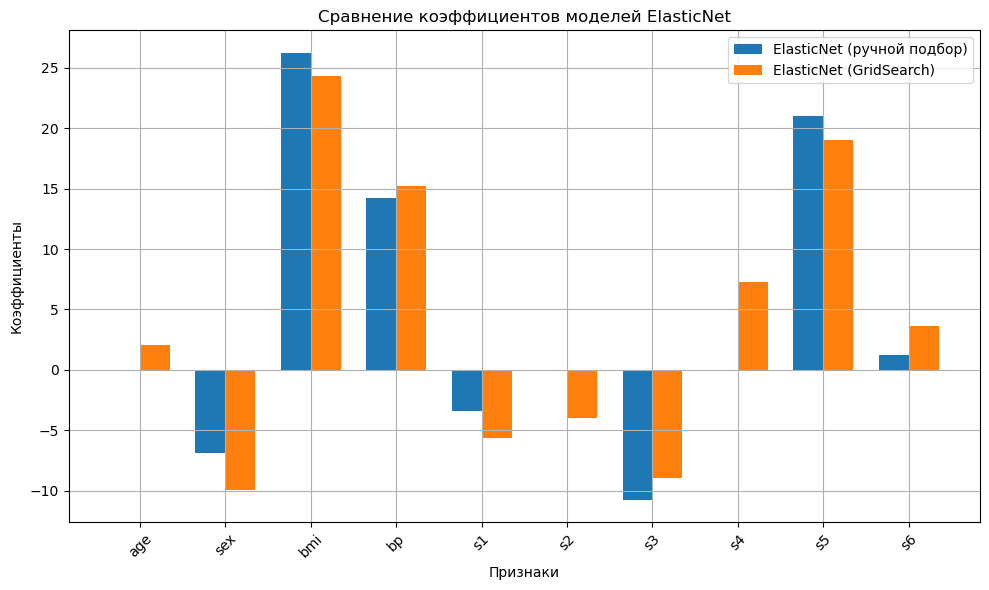

In [27]:
# Данные моделей
results = [
    {
        'label': 'ElasticNet (ручной подбор)',
        'alpha': 2.329951810515372,
        'l1_ratio': 1.0,
        'train_mse': 2942.73,
        'test_mse': 2798.16,
        'train_r2': 0.516,
        'test_r2': 0.472,
        'coef': np.array([0.0, -6.90, 26.26, 14.24, -3.39, 0.0, -10.77, 0.0, 21.01, 1.24])
    },
    {
        'label': 'ElasticNet (GridSearch)',
        'alpha': 0.10985411419875583,
        'l1_ratio': 0.01,
        'train_mse': 2908.59,
        'test_mse': 2858.28,
        'train_r2': 0.521,
        'test_r2': 0.461,
        'coef': np.array([2.03, -9.97, 24.31, 15.23, -5.63, -3.95, -8.95, 7.31, 19.01, 3.67])
    }
]

# Названия признаков
features = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

# Построение графика коэффициентов
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(features))

for i, res in enumerate(results):
    ax.bar(index + i * bar_width, res['coef'], bar_width, label=res['label'])

ax.set_xlabel('Признаки')
ax.set_ylabel('Коэффициенты')
ax.set_title('Сравнение коэффициентов моделей ElasticNet')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(features, rotation=45)
ax.legend()
ax.grid(True)

plt.tight_layout()
plt.show()


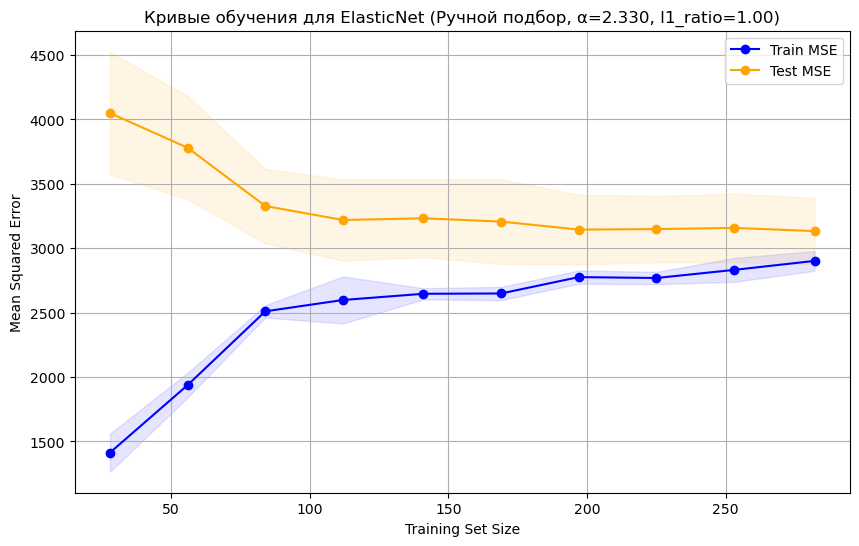

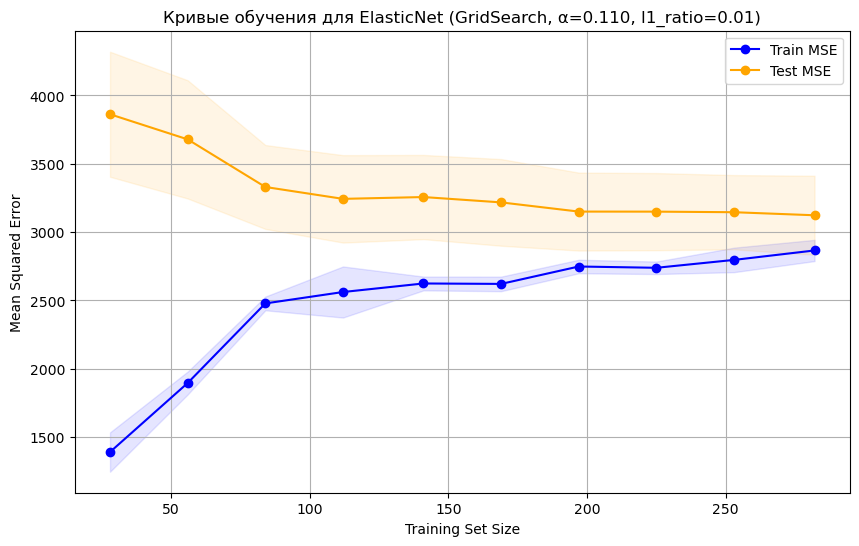

In [38]:
# Создание финальных моделей с лучшими параметрами
elastic_manual = ElasticNet(alpha=best_params_manual['alpha'], l1_ratio=best_params_manual['l1_ratio'], random_state=42)
elastic_manual.fit(X_train, y_train)

elastic_grid = ElasticNet(alpha=best_params_cv['alpha'], l1_ratio=best_params_cv['l1_ratio'], random_state=42)
elastic_grid.fit(X_train, y_train)

# Кривые обучения для модели с ручным подбором
plot_learning_curve(
    elastic_manual, 
    f"Кривые обучения для ElasticNet (Ручной подбор, α={best_params_manual['alpha']:.3f}, l1_ratio={best_params_manual['l1_ratio']:.2f})", 
    X_train, y_train
)

# Кривые обучения для модели с GridSearch
plot_learning_curve(
    elastic_grid, 
    f"Кривые обучения для ElasticNet (GridSearch, α={best_params_cv['alpha']:.3f}, l1_ratio={best_params_cv['l1_ratio']:.2f})", 
    X_train, y_train
)

### **ElasticNet: Подробный анализ**

### 1. **ElasticNet (ручной перебор)**

* **Оптимальные параметры**:

  * `alpha`: 2.33
  * `l1_ratio`: 1.0 (что соответствует Lasso)
* **Качество модели**:

  * Train MSE: **2942.73**
  * Test MSE: **2798.16**
  * Train R²: **0.516**
  * Test R²: **0.472**
* **Обнуленные коэффициенты**: **3**
* **Коэффициенты модели**:

  ```
  age     0.00
  sex    -6.90
  bmi    26.26
  bp     14.24
  s1     -3.39
  s2      0.00
  s3    -10.77
  s4      0.00
  s5     21.01
  s6      1.24
  ```
* **Вывод**: модель с параметрами, соответствующими Lasso, обнуляет 3 признака (`age`, `s2`, `s4`). Это способствует интерпретируемости и борьбе с переобучением. Качество модели сбалансировано.


### 2. **ElasticNet (GridSearchCV)**

* **Оптимальные параметры**:

  * `alpha`: 0.11
  * `l1_ratio`: 0.01 (практически Ridge)
* **Качество модели**:

  * Train MSE: **2908.59**
  * Test MSE: **2858.28**
  * Train R²: **0.521**
  * Test R²: **0.461**
* **Обнуленные коэффициенты**: **0**
* **Коэффициенты модели**:

  ```
  age     2.03
  sex    -9.97
  bmi    24.31
  bp     15.23
  s1     -5.63
  s2     -3.95
  s3     -8.95
  s4      7.31
  s5     19.01
  s6      3.67
  ```
* **Вывод**: модель с доминирующим влиянием L2-регуляризации не обнуляет коэффициенты, что соответствует свойствам Ridge. Однако точность на тесте немного ниже, чем при ручной настройке, и модель менее разрежена.


### Сводная таблица моделей

| Модель                     | Alpha | L1 Ratio | Train MSE | Test MSE | Train R² | Test R² | Обнуленные коэф. |
| -------------------------- | ----- | -------- | --------- | -------- | -------- | ------- | ---------------- |
| ElasticNet (ручной подбор) | 2.33  | 1.00     | 2942.73   | 2798.16  | 0.516    | 0.472   | 3                |
| ElasticNet (GridSearch)    | 0.11  | 0.01     | 2908.59   | 2858.28  | 0.521    | 0.461   | 0                |

### Общие выводы:

* **ElasticNet (ручной подбор)** показал лучшую **обобщающую способность** на тестовой выборке при умеренной разреженности модели. Это позволяет использовать модель и для интерпретации.
* **GridSearch-подбор** выбрал почти Ridge-подобную модель с чуть худшим качеством на тесте и отсутствием зануленных коэффициентов.
* Как и ожидалось:

  * При **l1\_ratio = 1** модель ведёт себя как Lasso (Sparse, высокая интерпретируемость).
  * При **l1\_ratio ≈ 0** модель ведёт себя как Ridge (Dense, устойчивость к мультиколлинеарности).
* **Рекомендация**: Если важна **интерпретируемость**, лучше использовать ElasticNet с высокими значениями `l1_ratio`.


## Подробный анализ результатов моделей

### 1. **Linear Regression (OLS)**

* **Train R² = 0.528**, **Test R² = 0.453**
* Модель обучается на максимум, не имея штрафа за сложность.
* Хотя на обучающей выборке достигается высокая точность, на тестовой результат хуже большинства регуляризованных моделей.
* Это свидетельствует о **переобучении**, особенно при наличии коррелированных или нерелевантных признаков.

### 2. **Ridge-регрессия (L2)**

#### Ручной подбор (α=70.55):

* **Train R² = 0.517**, **Test R² = 0.462**
* Добавление L2-регуляризации стабилизировало модель, уменьшив переобучение.
* Все коэффициенты остаются ненулевыми → не происходит отбора признаков, но веса сглаживаются.

#### GridSearch (α=30.54):

* **Train R² = 0.522**, **Test R² = 0.460**
* Подбор через кросс-валидацию дал чуть лучшее значение на обучающей выборке, но результат на тесте почти идентичен.
* Ridge работает особенно хорошо при наличии мультиколлинеарности, но **не упрощает модель**.

### 3. **Lasso-регрессия (L1)**

#### Ручной подбор (α=2.26):

* **Train R² = 0.516**, **Test R² = 0.472**
* Модель занулила **3 коэффициента** → автоматическая селекция признаков.
* Лучший результат по **Test MSE = 2798.10** и **Test R² = 0.472**.
* Превосходит Ridge и OLS, особенно на тесте — модель менее подвержена переобучению и проще интерпретируется.

#### GridSearch (α=1.56):

* Почти идентичный результат: **Test R² = 0.471**, занулены те же 3 признака.
* Алгоритм кросс-валидации подобрал оптимальный баланс между ошибкой и регуляризацией.

### 4. **ElasticNet** — комбинированный подход (L1 + L2)

#### Ручной подбор (α=2.33, l1\_ratio=1.0 → фактически Lasso):

* Результаты практически идентичны Lasso: **Test R² = 0.472**, **3 обнулённых признака**.
* Модель получила **лучший результат по обобщающей способности**, как и Lasso.
* ElasticNet с l1\_ratio=1 — это просто Lasso, но с потенциальной возможностью перехода к гибридной форме.

#### GridSearch (α=0.11, l1\_ratio=0.01 → близко к Ridge):

* **Test R² = 0.461**, **все признаки сохранены**.
* Несмотря на комбинированный подход, фактически работает как Ridge, и результат это подтверждает.
* Такой подбор выгоден, если все признаки информативны и мультиколлинеарность выражена.


## Сводная таблица по результатам всех моделей

| Модель                      | Alpha | L1 Ratio | Train MSE | Test MSE    | Train R² | Test R²   | # Обнул. коэф. |
| --------------------------- | ----- | -------- | --------- | ----------- | -------- | --------- | -------------- |
| **OLS (без рег.)**          | –     | –        | 2868.55   | 2900.19     | 0.528    | 0.453     | 0              |
| **Ridge (ручной)**          | 70.55 | 0.0      | 2935.97   | 2853.29     | 0.517    | 0.462     | 0              |
| **Ridge (GridSearch)**      | 30.54 | 0.0      | 2902.96   | 2861.63     | 0.522    | 0.460     | 0              |
| **Lasso (ручной)**          | 2.26  | 1.0      | 2940.25   | **2798.10** | 0.516    | **0.472** | 3              |
| **Lasso (GridSearch)**      | 1.56  | 1.0      | 2920.45   | 2800.95     | 0.519    | 0.471     | 3              |
| **ElasticNet (ручной)**     | 2.33  | 1.0      | 2942.73   | 2798.16     | 0.516    | **0.472** | 3              |
| **ElasticNet (GridSearch)** | 0.11  | 0.01     | 2908.59   | 2858.28     | 0.521    | 0.461     | 0              |


## Общие выводы по курсовой работе

### Цели курсовой:

* Исследовать влияние регуляризации на качество линейных моделей.
* Сравнить L1, L2 и ElasticNet-регуляризации.
* Изучить влияние параметров регуляризации на метрики и структуру модели.

### Ключевые наблюдения:

1. **Регуляризация** существенно повышает **устойчивость модели** и **снижает переобучение**, особенно при большом числе признаков.
2. **Lasso и ElasticNet (l1\_ratio=1)** продемонстрировали **лучшее качество на тестовой выборке**, а также **упрощение модели** за счёт зануления неинформативных признаков.
3. **Ridge-регрессия** показала себя как надёжный метод при коррелированных признаках, но без отбора фичей.
4. **GridSearch** помогает найти более оптимальные значения гиперпараметров, однако при этом **интерпретируемость модели может снизиться**, как в случае с ElasticNet (l1\_ratio ≈ 0).

### Практические рекомендации:

* Для задач, где важна **интерпретируемость** → использовать **Lasso** или **ElasticNet с l1\_ratio ≈ 1**.
* При наличии сильной **мультиколлинеарности** и шумов — лучше подходит **Ridge**.
* **ElasticNet** хорош, когда требуется **сбалансировать** оба эффекта: сглаживание + селекция.